# Shapely 2.0 demo

In [1]:
import numpy as np

import shapely
from shapely import Point

In [2]:
points = np.array([Point(0, 0), Point(1, 1), Point(2, 2)])
polygon = shapely.box(0, 0, 2, 2)

shapely.contains(polygon, points)

array([False,  True, False])

In [3]:
shapely.distance(points[:, np.newaxis], points[np.newaxis, :])

array([[0.        , 1.41421356, 2.82842712],
       [1.41421356, 0.        , 1.41421356],
       [2.82842712, 1.41421356, 0.        ]])

In [2]:
import shapely

In [22]:
polygons = shapely.get_parts(
            shapely.union_all(
                shapely.buffer(shapely.points(np.random.random((2000, 2)) * 500), 5)
            )
        )

In [23]:
tree = shapely.STRtree(polygons)

In [24]:
len(polygons)

485

In [25]:
points = shapely.points((np.random.random((10000, 2)) * 750) - 125)

In [38]:
from shapely.plotting import plot_polygon, plot_points

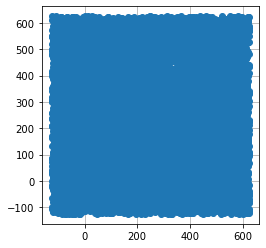

In [39]:
plot_points(shapely.MultiPoint(list(points)))

In [26]:
len(points)

10000

In [50]:
shapely.contains(polygons, points[:, np.newaxis])

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [27]:
%timeit shapely.contains(polygons, points[:, np.newaxis])

259 ms ± 12.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [42]:
tree.query(points, predicate="within")

array([[   1,    6,    8, ..., 9988, 9991, 9996],
       [ 430,  474,  373, ...,  255,  255,   12]])

In [43]:
%timeit tree.query(points, predicate="within")

105 ms ± 9.11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [44]:
tree = shapely.STRtree(points)

In [45]:
%timeit tree.query(polygons, predicate="contains")

1.07 ms ± 60.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [48]:
tree.query(polygons, predicate="contains")

array([[   1,    1,    1, ...,  484,  484,  484],
       [8780, 8219,  262, ..., 2224, 5212, 4210]])

In [49]:
_.shape

(2, 2092)

In [30]:
shapely.prepare(polygons)

In [ ]:
        # create irregular polygons my merging overlapping point buffers
        self.polygons = shapely.get_parts(
            shapely.union_all(
                shapely.buffer(shapely.points(np.random.random((2000, 2)) * 500), 5)
            )
        )
        self.tree = shapely.STRtree(self.polygons)
        # initialize the tree by making a tiny query first
        self.tree.query(shapely.points(0, 0))

        # create points that extend beyond the domain of the above polygons to ensure
        # some don't overlap
        self.points = shapely.points((np.random.random((2000, 2)) * 750) - 125)
        self.point_tree = shapely.STRtree(
            shapely.points(np.random.random((2000, 2)) * 750)
        )
        self.point_tree.query(shapely.points(0, 0))
